<a href="https://colab.research.google.com/github/Pusp203/AI-ML-DL-CV-NLP-Projects/blob/main/CIFAR_10_Object_Recognition_using_ResNet50_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install kaggle

In [21]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [22]:
# daatset api
!kaggle competitions download -c cifar-10

In [23]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [24]:
#extracting the compressed dataset
from zipfile import ZipFile
dataset='/content/cifar-10.zip'

with ZipFile(dataset,'r')as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [25]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [26]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 77.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 80.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 39.4 MB/s eta 0:00:00


In [27]:
import py7zr
archive=py7zr.SevenZipFile('/content/train.7z',mode='r')
archive.extractall()
archive.close()

In [28]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Importing the Dependencies


In [29]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split


In [30]:
filenames=os.listdir('/content/train')


In [31]:
type(filenames)

list

In [32]:
len(filenames)

50000

In [33]:
print(filenames[0:5])

['18730.png', '14736.png', '49379.png', '26419.png', '14513.png']


In [34]:
print(filenames[-5:])


['25261.png', '2916.png', '5390.png', '31986.png', '23388.png']


Labels Processing


In [35]:
labels_df=pd.read_csv("/content/trainLabels.csv")

In [36]:
labels_df.shape

(50000, 2)

In [37]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [38]:
labels_df[labels_df['id']==18730]

,id,label
18729,18730,dog


In [39]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [40]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [41]:
labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [42]:
labels_df['label']

,label
0,frog
1,truck
2,truck
3,deer
4,automobile
...,...
49995,bird
49996,frog
49997,truck
49998,automobile


In [43]:
labels_dictinary={'airplane':0,'automobile':1,'bird':2,'cat':3,'deer':4,'dog':5,'frog':6,'horse':7,'ship':8,'truck':9}

labels=[labels_dictinary[i] for i in labels_df['label']]

In [44]:
print(labels)

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9, 4, 5, 6, 4, 2, 1, 1, 2, 1, 5, 9, 9, 0, 8, 4, 1, 1, 6, 3, 3, 9, 0, 7, 9, 7, 7, 9, 1, 5, 1, 6, 6, 8, 7, 1, 3, 0, 

In [45]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


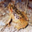

In [46]:
#displaying sample image
import cv2
from google.colab.patches import cv2_imshow

img=cv2.imread('/content/train/7796.png')
cv2_imshow(img)

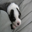

In [47]:
import cv2
from google.colab.patches import cv2_imshow

img=cv2.imread('/content/train/45888.png')
cv2_imshow(img)

In [48]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [50]:
id_list=list(labels_df['id'])

Image processing

In [59]:
#convert images to numpy arrays
train_data_folder='/content/train/'
data=[]
for id in id_list:
  # img_path=Image.open(train_data_folder + str(id)+'.png')
  # print(img_path)

  # if id>=5:
  #   break
  image=Image.open(train_data_folder + str(id) + '.png')
  image=np.array(image)
  data.append(image)

In [60]:
type(data)

list

In [61]:
len(data)

50000

In [62]:
type(data[0])

numpy.ndarray

In [63]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
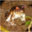

In [64]:
data[0]

In [65]:
#convert images list and label list to numpy arrays
X=np.array(data)
Y=np.array(labels)

In [66]:
type(X)

numpy.ndarray

In [68]:
print(X.shape) #50k numpy arrays or 50k images of shape 32*32 with 3 color channels
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


Train Test SPlit

In [69]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [70]:
print(X.shape,X_train.shape,X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [ ]:
#Scaling the data
